In [3]:

! pip install highlight_text      

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text
from PIL import Image
import urllib
import os
import math

In [5]:
## Reading Data (csv)

In [6]:
df = pd.read_excel('C:/Users/lione/Documents/Entrainement _logiciels/Python/Ligue1_2021-2022.xlsx')
df.head()

,Clt,Équipe,Team_id,MJ,V,N,D,BM,BE,DB,Pts,Pts/MJ,xG,xGA,xGD,xGD/90,Affluence,Meilleur buteur de l'équipe,Gardien de but,Notes
0,1,Paris S-G,9847,38,26,8,4,90,36,54,86,2.26,76.5,38.6,37.9,1.00,41589,Kylian Mbappé - 28,Keylor Navas,→ Europa League grâce à sa bonne place dans le...
1,2,Marseille,8592,38,21,8,9,63,38,25,71,1.87,59.2,40.0,19.1,0.50,51755,Dimitri Payet - 12,Pau López,→ Europa Conference League grâce à sa bonne pl...
2,3,Monaco,9829,38,20,9,9,65,40,25,69,1.82,58.0,42.0,16.0,0.42,5877,Wissam Ben Yedder - 25,Alexander Nübel,NaN
3,4,Rennes,9851,38,20,6,12,82,40,42,66,1.74,62.3,40.7,21.6,0.57,25493,Martin Terrier - 21,Alfred Gomis,NaN
4,5,Nice,9831,38,20,7,11,52,36,16,66,1.74,57.0,45.2,11.8,0.31,16055,Andy Delort - 16,Walter Benítez,1-point deduction 1


In [7]:
## Sélection des données (ici on veut la différence entre buts encaissés et xGA)

df_1 = df[['Équipe', 'Team_id', 'BE', 'xGA']] # Nouveau df (df_1) : on sélectionne les 3 colonnes qui nous intéressent
df_1 = df_1.assign(difference = df_1['xGA'] - df_1['BE'])  # On rajoute une colonne à df_1 : différence xGA et BE
df_1 = df_1.sort_values(by='difference').reset_index(drop=True)  # drop = True => n'affiche pas l'index
# Tri par rapport à la différence odre croissant



df_1.head()  # On affiche






,Équipe,Team_id,BE,xGA,difference
0,Bordeaux,9827,91,69.6,-21.4
1,Clermont Foot,8311,69,53.0,-16.0
2,Saint-Étienne,9853,77,61.2,-15.8
3,Lorient,8689,63,52.1,-10.9
4,Lille,8639,48,40.4,-7.6


<BarContainer object of 20 artists>

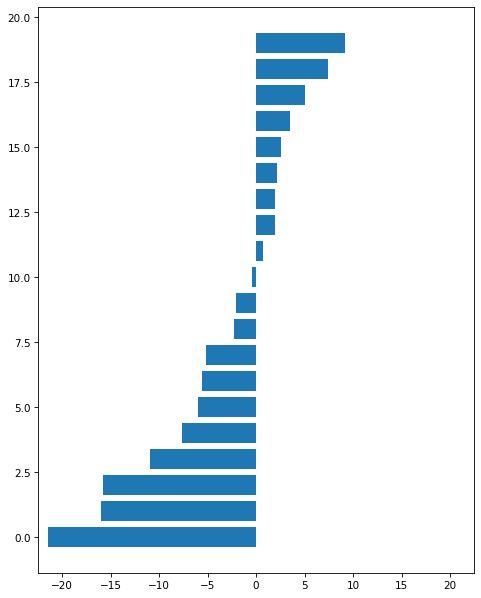

In [8]:
## Bar Chart

fig = plt.figure(figsize=(7.5,10), dpi=75)   # taille du cadre
ax = plt.subplot()  # tracer le cadre


# Ensure symmetrical limits on the x-axis

max_ = max(abs(df_1['difference'].min()), df_1['difference'].max()) # On sélectionne la plus longue barre

max_ = max_*(1.05)  # marge de 5% entre le cadre et le bout de la plus grande barre.




ax.set_xlim(-max_, max_)  # affiche de la graduation de l'axe des abscises : -max jusqu'au max

ax.barh(df_1.index, df_1['difference'])  # tracer le diagramme en barre

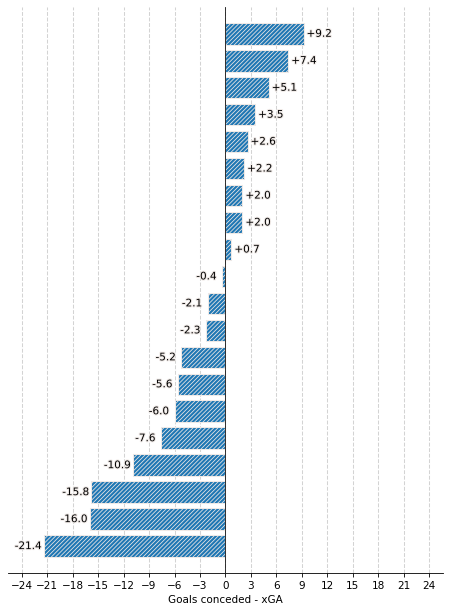

In [9]:
## Improve the visual


fig = plt.figure(figsize=(7.5,10), dpi=75)   # taille du cadre
ax = plt.subplot()    # tracer le cadre


# Remove the left spine (y-axis)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # remove values which are on the left spine

# Add gridlines in background

ax.grid(ls='--', lw=1, color='lightgrey', axis='x')


# Hatches (hachures) bars

plt.rcParams['hatch.linewidth'] = 0.75  #(taille des hachures)

#------------------------------------

max_ = max(abs(df_1['difference'].min()), df_1['difference'].max())

# Add 20% margin of the limit to the x-axis
max_ = max_*(1.2)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_1.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # graduation de 3 en 3 pour l'axe des abscisses
ax.set_xlabel('Goals conceded - xGA', size=10)  # Nom de l'axe des abscisses





# -- Bar Chart -------------------------------------
ax.barh(
    df_1.index, df_1['difference'],
    hatch='//////', ec='#efe9e6',  # couleur des hachures et du contour de chaque bar
    zorder=3
    
# Tracer la droite verticale noire au milieu de la figure    
)
ax.plot(
    [0,0], # point de départ
    [ax.get_ylim()[0], ax.get_ylim()[1]], # point d'arrivée 
    color='black',
    lw=.75,
    zorder=4
)
# La figure dont "Zorder" est le plus petit est tracée en 1er




#-------Annotations next to the bars--------------

for index, x in enumerate(df_1['difference']):
    if x < 0:
        sign_offset = -1
        sign_text = ''
    else:
        sign_offset = 1
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    
    


In [10]:
# Add logo

# Function (with Fotmob)

def add_logo_on_ax(ax, team_id, bw = False):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))  #.convert('LA')  (B&W)
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax


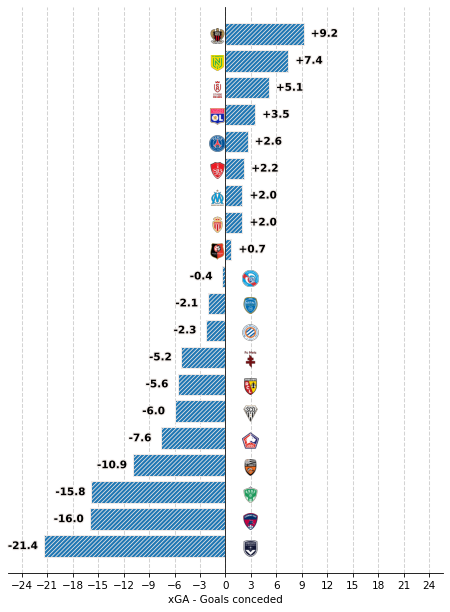

In [11]:
## Improve the visual


fig = plt.figure(figsize=(7.5,10), dpi=75)   # taille du cadre
ax = plt.subplot()    # tracer le cadre


# Remove the left spine (y-axis)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # remove values which are on the left spine

# Add gridlines in background

ax.grid(ls='--', lw=1, color='lightgrey', axis='x')


# Hatches (hachures) bars

plt.rcParams['hatch.linewidth'] = 0.75  #(taille des hachures)

#------------------------------------

max_ = max(abs(df_1['difference'].min()), df_1['difference'].max())

# Add 20% margin of the limit to the x-axis
max_ = max_*(1.2)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_1.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # graduation de 3 en 3 pour l'axe des abscisses
ax.set_xlabel('xGA - Goals conceded', size=10)  # Nom de l'axe des abscisses





# -- Bar Chart -------------------------------------
ax.barh(
    df_1.index, df_1['difference'],
    hatch='//////', ec='#efe9e6',  # couleur des hachures et du contour de chaque bar
    zorder=3
    
# Tracer la droite verticale noire au milieu de la figure    
)
ax.plot(
    [0,0], # point de départ
    [ax.get_ylim()[0], ax.get_ylim()[1]], # point d'arrivée 
    color='black',
    lw=.75,
    zorder=4
)
# La figure dont "Zorder" est le plus petit est tracée en 1er




#-------Annotations next to the bars--------------

# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df_1['difference']):
    if x < 0:
        sign_offset = -1
        offset_logo = .65
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .65
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*20,0), # espacement entre les valeurs et les bars
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

# -- Add the logo-------------------


    team_id = df_1['Team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-3)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id)

In [12]:
#---------------------Gradient---------------------
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name = 'SOC', cmap=soc_cm)
                 


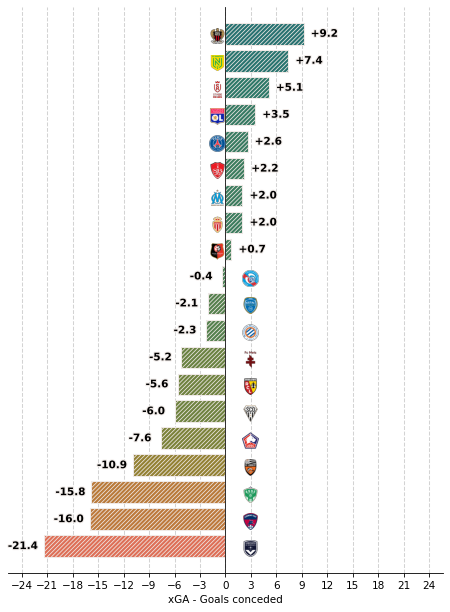

In [13]:

## Improve the visual


fig = plt.figure(figsize=(7.5,10), dpi=75)   # taille du cadre
ax = plt.subplot()    # tracer le cadre


# Remove the left spine (y-axis)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # remove values which are on the left spine

# Add gridlines in background

ax.grid(ls='--', lw=1, color='lightgrey', axis='x')


# Hatches (hachures) bars

plt.rcParams['hatch.linewidth'] = 0.75  #(taille des hachures)

#------------------------------------

max_ = max(abs(df_1['difference'].min()), df_1['difference'].max())

# Add 20% margin of the limit to the x-axis
max_ = max_*(1.2)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_1.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # graduation de 3 en 3 pour l'axe des abscisses
ax.set_xlabel('xGA - Goals conceded', size=10)  # Nom de l'axe des abscisses





# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=df_1['difference'].min(),vmax=df_1['difference'].max())
cmap = plt.get_cmap('SOC')

ax.barh(
    df_1.index, df_1['difference'],
    hatch='//////', ec='#efe9e6',  # couleur des hachures et du contour de chaque bar
    color = cmap(norm(df_1['difference'])),  # couleur dégradée
    zorder=3
    
# Tracer la droite verticale noire au milieu de la figure    
)
ax.plot(
    [0,0], # point de départ
    [ax.get_ylim()[0], ax.get_ylim()[1]], # point d'arrivée 
    color='black',
    lw=.75,
    zorder=4
)
# La figure dont "Zorder" est le plus petit est tracée en 1er




#-------Annotations next to the bars--------------

# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df_1['difference']):
    if x < 0:
        sign_offset = -1
        offset_logo = .65
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .65
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*20,0), # espacement entre les valeurs et les bars
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

# -- Add the logo-------------------


    team_id = df_1['Team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-3)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id)

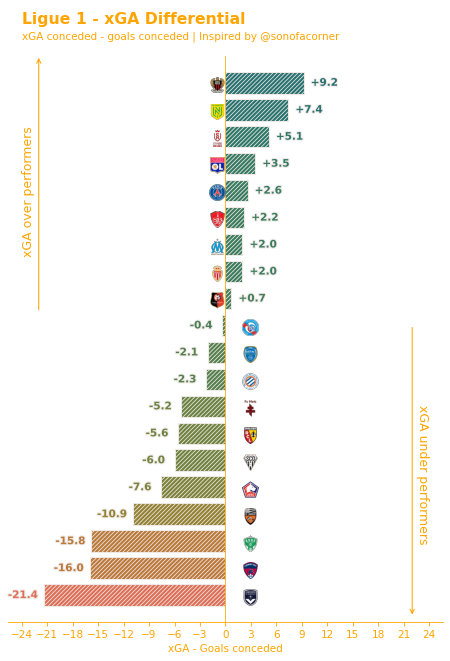

In [15]:
## Improve the visual


fig = plt.figure(figsize=(7.5,10), dpi=75)   # taille du cadre
ax = plt.subplot()    # tracer le cadre


# Remove the left spine (y-axis)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_color('orange') # Couleur de l'axe des abscisses
ax.yaxis.set_ticks([])  # remove values which are on the left spine

# Add gridlines in background

#ax.grid(ls='--', lw=1, color= 'black', axis='x')  # autre couleur : 'lightgrey'


# Hatches (hachures) bars

plt.rcParams['hatch.linewidth'] = 0.75  #(taille des hachures)

#------------------------------------

max_ = max(abs(df_1['difference'].min()), df_1['difference'].max())

# Add 20% margin of the limit to the x-axis
max_ = max_*(1.2)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_1.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # graduation de 3 en 3 pour l'axe des abscisses
ax.set_xlabel('xGA - Goals conceded', size=10, color = 'orange')  # Nom de l'axe des abscisses
ax.tick_params(axis='x', colors='orange') # Couleur des valeurs (graduation)
 



# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=df_1['difference'].min(),vmax=df_1['difference'].max())
cmap = plt.get_cmap('SOC')

ax.barh(
    df_1.index, df_1['difference'],
    hatch='//////', ec='#efe9e6',  # couleur des hachures et du contour de chaque bar
    color = cmap(norm(df_1['difference'])),  # couleur dégradée
    zorder=3
    
# Tracer la droite verticale noire au milieu de la figure    
)
ax.plot(
    [0,0], # point de départ
    [ax.get_ylim()[0], ax.get_ylim()[1]], # point d'arrivée 
    color='orange',
    lw=.75,
    zorder=4
)
# La figure dont "Zorder" est le plus petit est tracée en 1er




#-------Annotations next to the bars--------------

# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df_1['difference']):
    if x < 0:
        sign_offset = -1
        offset_logo = .65
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .65
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*20,0), # espacement entre les valeurs et les bars
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points',
        color= cmap(norm(x))  # couleur valeur = couleur de la bar
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

# -- Add the logo-------------------


    team_id = df_1['Team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-3)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id)
    
    
    
 # --------Final Touch ----------------

position_negative = df_1[df_1['difference'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='orange')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='orange')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2

ax.annotate(
    xy=(position_x_negative,mid_point_positive),   # flèche vers le haut
    text='xGA over performers',
    color = 'orange',
    rotation=90,
    xytext=(-10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),    # flèche vers le bas
    text='xGA under performers',
    color = 'orange',
    rotation=-90,
    xytext=(10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)

fig_text(
    x = 0.15, y = .92, 
    s = 'Ligue 1 - xGA Differential',
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'orange', weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.9, 
    s = 'xGA conceded - goals conceded | Inspired by @sonofacorner',
    va = 'bottom', ha = 'left',
    fontsize = 10, color = 'orange'
)

#plt.savefig(
#	"C:/Users/lione/Documents/Entrainement _logiciels/Python/xGA_differential_1.png",
#	dpi = 600,
#	facecolor = "#EFE9E6",
#	bbox_inches="tight",
 #   edgecolor="none",
#	transparent = False
#)

plt.savefig(
	"C:/Users/lione/Documents/Entrainement _logiciels/Python/xGA_differential_2.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True   # fond noir
)